## Importing the required libraries

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.layers import LSTM
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import pandas as pd

/home/stjepan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data

In [24]:
# FEATURES npy (audiofiles in array format):
# https://drive.google.com/file/d/1L2pQ-tyKJ80pJpG8HtXqyAfrvLuvY7Wn/view?usp=sharing

# LABELS cvs:
# https://drive.google.com/open?id=1SE8BFFR-uXUQaMGe-F0cs2a-jpyHTP2m


In [2]:
features = np.load('/home/stjepan/Documents/_Krish_Suchitra_Tristan_PORTFOLIO/Krish_/features_750.npy') #loading features data


In [3]:
features[0][0,:].shape   #shape of one sample corresponds to sampling rate*duration (frequency*time)


(189630,)

In [4]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(features):
        mfccs = np.mean(librosa.feature.mfcc(y[0,:], 
                                            sr=44100, #actual sample-rate (checked with audio editor "Audacity")
                                            n_mfcc=26),
                                            axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1 
        


In [5]:
df.head(5)

,feature
0,"[-5.0038379848847985, -6.0978876885962885, -6...."
1,"[0.6680194823128266, 1.8812717666212868, 2.879..."
2,"[1.9046676283469397, 2.566300814964216, 3.5389..."
3,"[4.748403010193775, 4.584184944443253, 4.86697..."
4,"[2.4497768096563437, 2.8794019812259553, 3.792..."


In [6]:
df3 = pd.DataFrame(df['feature'].values.tolist()) #Unpacking features

In [7]:
df3.head() #number of columns/features corresponds to mfccs.shape 

,0,1,2,3,4,5,6,7,8,9,...,361,362,363,364,365,366,367,368,369,370
0,-5.003838,-6.097888,-6.600776,-8.064827,-9.873759,-9.033856,-8.152641,-7.923820,-8.350693,-10.048078,...,-16.915115,-16.434408,-17.163610,-17.314025,-17.066374,-17.301021,-17.991353,-17.877399,-17.642816,-14.987647
1,0.668019,1.881272,2.879992,1.697623,-0.000696,-0.675504,-0.087963,1.107432,1.475742,0.545645,...,-10.610373,-10.835792,-10.082373,-10.378201,-9.835242,-9.606284,-10.270463,-10.376363,-11.559375,-12.914964
2,1.904668,2.566301,3.538997,2.811780,1.456376,0.783416,1.230758,2.404372,2.793768,1.896953,...,-10.237371,-10.464664,-9.616362,-10.218680,-9.881539,-9.115429,-9.614814,-9.076763,-9.840254,-11.206347
3,4.748403,4.584185,4.866979,5.267792,3.455902,1.821999,3.879972,4.338966,4.917631,4.558664,...,-9.399462,-9.297884,-8.696020,-9.274952,-8.995504,-8.557913,-9.342351,-8.886664,-7.539767,-5.684754
4,2.449777,2.879402,3.792186,3.276232,2.020116,1.398140,1.813260,2.974592,3.371070,2.508307,...,-10.123322,-10.301123,-9.456789,-10.049378,-9.747892,-9.184113,-9.873268,-8.552644,-9.264091,-10.430746


In [12]:
labels = pd.read_csv("/home/stjepan/Documents/_Krish_Suchitra_Tristan_PORTFOLIO/Krish_/labels_750.csv", delimiter="\t")  #reading labels from csv

In [19]:
labels

,delay.decays,delay.delays,delay.gain_in,delay.gain_out,delay.parallel,overdrive.gain,reverb.hf_damping,reverb.pre_delay,reverb.reverberance,reverb.room_scale,reverb.stereo_depth,reverb.wet_gain,reverb.wet_only
0,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,30,50,20,50,100,100,0,False
1,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,54,50,20,50,100,100,0,False
2,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,58,50,20,50,100,100,0,False
3,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,75,50,20,50,100,100,0,False
4,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,60,50,20,50,100,100,0,False
5,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,57,50,20,50,100,100,0,False
6,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,13,50,20,50,100,100,0,False
7,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,10,50,20,50,100,100,0,False
8,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,57,50,20,50,100,100,0,False
9,"[0.3, 0.25]","[1000, 1800]",0.8,0.5,False,37,50,20,50,100,100,0,False


In [26]:
labels


0      30
1      54
2      58
3      75
4      60
5      57
6      13
7      10
8      57
9      37
10     64
11     68
12     53
13     55
14     28
15     35
16     55
17     52
18     36
19     46
20     44
21     57
22     22
23     54
24     27
25     57
26     61
27     49
28     38
29     42
       ..
720    61
721    29
722    45
723    28
724    16
725    16
726    45
727    45
728    27
729    30
730    70
731    79
732    55
733    51
734    25
735    49
736    68
737    60
738    45
739    66
740    47
741    72
742    75
743    66
744    57
745    61
746    41
747    57
748    54
749    78
Name: overdrive.gain, Length: 750, dtype: int64

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbbb7ea3c18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbbb7ea3c18>)

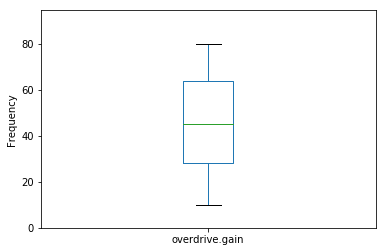

In [27]:
labels.plot.hist(), labels.plot.box() #plotting distribution of labels

#### Concatenating features and labels

In [28]:
newdf = pd.concat([df3,labels], axis=1)

In [32]:
type(newdf["overdrive.gain"][0])

numpy.int64

In [33]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [34]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,overdrive.gain
0,-5.003838,-6.097888,-6.600776,-8.064827,-9.873759,-9.033856,-8.152641,-7.923820,-8.350693,-10.048078,...,-16.434408,-17.163610,-17.314025,-17.066374,-17.301021,-17.991353,-17.877399,-17.642816,-14.987647,30
1,0.668019,1.881272,2.879992,1.697623,-0.000696,-0.675504,-0.087963,1.107432,1.475742,0.545645,...,-10.835792,-10.082373,-10.378201,-9.835242,-9.606284,-10.270463,-10.376363,-11.559375,-12.914964,54
2,1.904668,2.566301,3.538997,2.811780,1.456376,0.783416,1.230758,2.404372,2.793768,1.896953,...,-10.464664,-9.616362,-10.218680,-9.881539,-9.115429,-9.614814,-9.076763,-9.840254,-11.206347,58
3,4.748403,4.584185,4.866979,5.267792,3.455902,1.821999,3.879972,4.338966,4.917631,4.558664,...,-9.297884,-8.696020,-9.274952,-8.995504,-8.557913,-9.342351,-8.886664,-7.539767,-5.684754,75
4,2.449777,2.879402,3.792186,3.276232,2.020116,1.398140,1.813260,2.974592,3.371070,2.508307,...,-10.301123,-9.456789,-10.049378,-9.747892,-9.184113,-9.873268,-8.552644,-9.264091,-10.430746,60


### Shuffling the data

In [35]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,overdrive.gain
304,2.448029,1.190310,3.756031,4.828240,2.739518,4.661156,5.249249,4.556993,4.266566,4.860596,...,-10.744374,-11.402024,-10.407164,-10.801756,-10.277572,-10.579529,-10.857492,-6.605040,-3.401465,75
585,-6.758004,-8.694605,-14.998717,-19.707375,-15.695820,-12.178458,-11.044602,-11.219227,-12.555677,-14.223119,...,-24.840373,-24.893999,-24.880095,-24.955674,-25.094479,-25.256347,-25.326752,-21.943500,-18.045679,21
725,-6.683301,-8.436580,-14.837358,-17.205523,-14.729317,-11.652805,-10.494286,-11.117785,-12.700361,-14.188310,...,-22.240014,-22.394409,-22.502861,-22.622538,-22.957131,-22.949715,-23.031604,-18.629776,-15.048722,16
548,-6.144418,-7.976359,-14.349048,-18.055478,-14.170427,-11.730065,-10.384780,-10.705527,-12.346309,-13.846274,...,-17.973703,-18.294157,-18.462446,-18.548182,-18.693796,-18.682898,-18.587826,-12.708450,-8.898619,25
360,-6.102332,-6.742185,-7.826229,-7.255514,-7.520836,-6.915523,-6.698965,-7.086177,-6.920992,-8.507933,...,-17.855738,-17.828716,-19.350998,-19.376972,-19.177194,-19.942922,-19.165142,-18.467380,-14.413840,42
75,-6.251290,-7.633490,-10.203361,-10.603612,-9.898168,-10.902701,-10.169848,-9.119439,-10.124427,-10.205331,...,-17.484021,-17.895469,-17.817774,-17.580695,-17.803913,-18.589974,-19.017748,-19.691313,-15.996091,36
353,-5.216621,-6.497249,-9.511435,-9.808722,-9.754016,-9.010836,-8.256068,-8.597307,-9.120874,-9.930333,...,-6.687161,-6.785746,-6.842855,-6.921640,-6.927849,-6.779973,-6.722065,-6.758056,-6.121782,48
104,-6.074987,-7.946673,-14.230449,-15.081138,-13.695287,-11.961171,-10.536821,-10.840502,-12.694729,-14.560259,...,-9.120493,-8.962806,-9.416045,-9.825162,-9.821529,-10.333984,-10.851977,-10.596039,-8.815489,31
312,-1.101149,-1.847265,-4.473943,-4.309392,-2.508614,-1.135639,-0.138839,-1.843383,-3.905015,-2.702847,...,-4.240627,-4.534258,-4.405951,-4.565189,-4.718674,-4.484543,-3.950822,-2.739828,-1.398949,63
603,1.244903,3.080401,3.439705,3.302281,3.698772,1.913896,0.469021,1.568758,1.696557,1.505894,...,-11.190750,-11.506477,-11.351610,-11.299991,-10.722873,-10.282924,-10.069962,-9.792883,-8.078848,66


In [37]:
rnewdf=rnewdf.fillna(0)

### Train/test split

In [38]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [39]:
trainfeatures = train.iloc[:, :-1]

trainlabel = train.iloc[:, -1:]

testfeatures = test.iloc[:, :-1]

testlabel = test.iloc[:, -1:]

In [40]:
from keras.utils import np_utils #not sure if this is necessary

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

### Pading inputs for CNN 

In [41]:
#the shape has to correspond to (nrows, nfeatures, 1)

print('Pad sequences')
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

Pad sequences


In [42]:
x_traincnn.shape, x_testcnn.shape

((597, 371, 1), (153, 371, 1))

## CNN model

In [47]:
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(371,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(1))

opt = keras.optimizers.adam(lr=0.0001)

There is a lot room for hyperparameter modification, so don't hesitate to change them

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 371, 128)          768       
_________________________________________________________________
activation_7 (Activation)    (None, 371, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 371, 128)          82048     
_________________________________________________________________
activation_8 (Activation)    (None, 371, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 371, 128)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 46, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 46, 128)           82048     
__________

##### Model compiling

In [49]:
model.compile(loss='mse', optimizer=opt, metrics=['mse', 'mae']) #selecting loss fn and metrics

### Model fitting

In [50]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=32, epochs=500, validation_data=(x_testcnn, y_test))

Train on 597 samples, validate on 153 samples
Epoch 1/500
597/597 [==============================] - 4s 7ms/step - loss: 2224.8124 - mean_squared_error: 2224.8124 - mean_absolute_error: 41.8172 - val_loss: 1465.1333 - val_mean_squared_error: 1465.1333 - val_mean_absolute_error: 32.0528
Epoch 2/500
597/597 [==============================] - 3s 6ms/step - loss: 1142.8390 - mean_squared_error: 1142.8390 - mean_absolute_error: 28.9437 - val_loss: 936.8902 - val_mean_squared_error: 936.8902 - val_mean_absolute_error: 25.9637
Epoch 3/500
597/597 [==============================] - 3s 6ms/step - loss: 739.3564 - mean_squared_error: 739.3564 - mean_absolute_error: 23.5035 - val_loss: 445.0560 - val_mean_squared_error: 445.0560 - val_mean_absolute_error: 18.2479
Epoch 4/500
597/597 [==============================] - 4s 6ms/step - loss: 298.1998 - mean_squared_error: 298.1998 - mean_absolute_error: 14.0383 - val_loss: 212.6406 - val_mean_squared_error: 212.6406 - val_mean_absolute_error: 12.5552


Epoch 36/500
597/597 [==============================] - 3s 6ms/step - loss: 26.1132 - mean_squared_error: 26.1132 - mean_absolute_error: 4.0434 - val_loss: 51.8555 - val_mean_squared_error: 51.8555 - val_mean_absolute_error: 6.0850
Epoch 37/500
597/597 [==============================] - 3s 6ms/step - loss: 25.4156 - mean_squared_error: 25.4156 - mean_absolute_error: 4.0333 - val_loss: 28.9018 - val_mean_squared_error: 28.9018 - val_mean_absolute_error: 4.2607
Epoch 38/500
597/597 [==============================] - 3s 6ms/step - loss: 22.3326 - mean_squared_error: 22.3326 - mean_absolute_error: 3.6849 - val_loss: 26.6659 - val_mean_squared_error: 26.6659 - val_mean_absolute_error: 4.0591
Epoch 39/500
597/597 [==============================] - 3s 6ms/step - loss: 22.9252 - mean_squared_error: 22.9252 - mean_absolute_error: 3.7511 - val_loss: 30.3920 - val_mean_squared_error: 30.3920 - val_mean_absolute_error: 4.3462
Epoch 40/500
597/597 [==============================] - 3s 6ms/step - lo

597/597 [==============================] - 3s 6ms/step - loss: 13.7181 - mean_squared_error: 13.7181 - mean_absolute_error: 2.8870 - val_loss: 29.2587 - val_mean_squared_error: 29.2587 - val_mean_absolute_error: 4.3298
Epoch 72/500
597/597 [==============================] - 3s 6ms/step - loss: 14.2130 - mean_squared_error: 14.2130 - mean_absolute_error: 2.9604 - val_loss: 37.6934 - val_mean_squared_error: 37.6934 - val_mean_absolute_error: 5.0632
Epoch 73/500
597/597 [==============================] - 4s 6ms/step - loss: 13.8016 - mean_squared_error: 13.8016 - mean_absolute_error: 2.8506 - val_loss: 27.0582 - val_mean_squared_error: 27.0582 - val_mean_absolute_error: 4.1835
Epoch 74/500
597/597 [==============================] - 3s 6ms/step - loss: 13.5587 - mean_squared_error: 13.5587 - mean_absolute_error: 2.8766 - val_loss: 19.2230 - val_mean_squared_error: 19.2230 - val_mean_absolute_error: 3.3197
Epoch 75/500
597/597 [==============================] - 3s 6ms/step - loss: 15.9445 -

597/597 [==============================] - 4s 6ms/step - loss: 10.1788 - mean_squared_error: 10.1788 - mean_absolute_error: 2.4820 - val_loss: 16.8316 - val_mean_squared_error: 16.8316 - val_mean_absolute_error: 3.0624
Epoch 107/500
597/597 [==============================] - 4s 6ms/step - loss: 13.0282 - mean_squared_error: 13.0282 - mean_absolute_error: 2.8486 - val_loss: 44.7544 - val_mean_squared_error: 44.7544 - val_mean_absolute_error: 5.7469
Epoch 108/500
597/597 [==============================] - 4s 6ms/step - loss: 10.3757 - mean_squared_error: 10.3757 - mean_absolute_error: 2.5301 - val_loss: 29.4757 - val_mean_squared_error: 29.4757 - val_mean_absolute_error: 4.2499
Epoch 109/500
597/597 [==============================] - 4s 6ms/step - loss: 10.6737 - mean_squared_error: 10.6737 - mean_absolute_error: 2.5141 - val_loss: 22.1107 - val_mean_squared_error: 22.1107 - val_mean_absolute_error: 3.5650
Epoch 110/500
597/597 [==============================] - 4s 6ms/step - loss: 9.993

597/597 [==============================] - 4s 6ms/step - loss: 7.6750 - mean_squared_error: 7.6750 - mean_absolute_error: 2.1256 - val_loss: 27.3722 - val_mean_squared_error: 27.3722 - val_mean_absolute_error: 4.0986
Epoch 142/500
597/597 [==============================] - 4s 6ms/step - loss: 7.5094 - mean_squared_error: 7.5094 - mean_absolute_error: 2.1173 - val_loss: 26.4664 - val_mean_squared_error: 26.4664 - val_mean_absolute_error: 3.8682
Epoch 143/500
597/597 [==============================] - 4s 6ms/step - loss: 7.7689 - mean_squared_error: 7.7689 - mean_absolute_error: 2.1790 - val_loss: 14.9730 - val_mean_squared_error: 14.9730 - val_mean_absolute_error: 2.8710
Epoch 144/500
597/597 [==============================] - 4s 6ms/step - loss: 7.0609 - mean_squared_error: 7.0609 - mean_absolute_error: 2.0808 - val_loss: 24.8991 - val_mean_squared_error: 24.8991 - val_mean_absolute_error: 3.9208
Epoch 145/500
597/597 [==============================] - 4s 6ms/step - loss: 7.0463 - mean

597/597 [==============================] - 4s 6ms/step - loss: 7.3987 - mean_squared_error: 7.3987 - mean_absolute_error: 2.1577 - val_loss: 17.1694 - val_mean_squared_error: 17.1694 - val_mean_absolute_error: 2.9924
Epoch 177/500
597/597 [==============================] - 4s 6ms/step - loss: 6.0025 - mean_squared_error: 6.0025 - mean_absolute_error: 1.9089 - val_loss: 22.4985 - val_mean_squared_error: 22.4985 - val_mean_absolute_error: 3.5425
Epoch 178/500
597/597 [==============================] - 4s 6ms/step - loss: 5.9545 - mean_squared_error: 5.9545 - mean_absolute_error: 1.8798 - val_loss: 22.8756 - val_mean_squared_error: 22.8756 - val_mean_absolute_error: 3.6725
Epoch 179/500
597/597 [==============================] - 4s 6ms/step - loss: 6.1929 - mean_squared_error: 6.1929 - mean_absolute_error: 1.9621 - val_loss: 42.2500 - val_mean_squared_error: 42.2500 - val_mean_absolute_error: 5.5726
Epoch 180/500
597/597 [==============================] - 4s 6ms/step - loss: 6.4939 - mean

597/597 [==============================] - 4s 6ms/step - loss: 5.7820 - mean_squared_error: 5.7820 - mean_absolute_error: 1.8864 - val_loss: 39.6753 - val_mean_squared_error: 39.6753 - val_mean_absolute_error: 5.3346
Epoch 212/500
597/597 [==============================] - 4s 6ms/step - loss: 4.7363 - mean_squared_error: 4.7363 - mean_absolute_error: 1.6978 - val_loss: 20.9431 - val_mean_squared_error: 20.9431 - val_mean_absolute_error: 3.3886
Epoch 213/500
597/597 [==============================] - 4s 6ms/step - loss: 4.1944 - mean_squared_error: 4.1944 - mean_absolute_error: 1.6158 - val_loss: 28.1118 - val_mean_squared_error: 28.1118 - val_mean_absolute_error: 4.2473
Epoch 214/500
597/597 [==============================] - 4s 6ms/step - loss: 4.1327 - mean_squared_error: 4.1327 - mean_absolute_error: 1.5966 - val_loss: 23.2791 - val_mean_squared_error: 23.2791 - val_mean_absolute_error: 3.7677
Epoch 215/500
597/597 [==============================] - 4s 6ms/step - loss: 4.7403 - mean

597/597 [==============================] - 4s 6ms/step - loss: 3.9514 - mean_squared_error: 3.9514 - mean_absolute_error: 1.5752 - val_loss: 21.4620 - val_mean_squared_error: 21.4620 - val_mean_absolute_error: 3.5606
Epoch 247/500
597/597 [==============================] - 4s 6ms/step - loss: 4.1594 - mean_squared_error: 4.1594 - mean_absolute_error: 1.6082 - val_loss: 26.6913 - val_mean_squared_error: 26.6913 - val_mean_absolute_error: 4.1411
Epoch 248/500
597/597 [==============================] - 4s 6ms/step - loss: 4.3083 - mean_squared_error: 4.3083 - mean_absolute_error: 1.6699 - val_loss: 22.4006 - val_mean_squared_error: 22.4006 - val_mean_absolute_error: 3.5464
Epoch 249/500
597/597 [==============================] - 4s 6ms/step - loss: 4.7362 - mean_squared_error: 4.7362 - mean_absolute_error: 1.7508 - val_loss: 17.9503 - val_mean_squared_error: 17.9503 - val_mean_absolute_error: 3.2476
Epoch 250/500
597/597 [==============================] - 4s 6ms/step - loss: 4.2209 - mean

597/597 [==============================] - 4s 6ms/step - loss: 3.3878 - mean_squared_error: 3.3878 - mean_absolute_error: 1.4439 - val_loss: 36.2233 - val_mean_squared_error: 36.2233 - val_mean_absolute_error: 4.9328
Epoch 282/500
597/597 [==============================] - 4s 6ms/step - loss: 3.4270 - mean_squared_error: 3.4270 - mean_absolute_error: 1.4388 - val_loss: 25.2117 - val_mean_squared_error: 25.2117 - val_mean_absolute_error: 3.9601
Epoch 283/500
597/597 [==============================] - 4s 6ms/step - loss: 3.2509 - mean_squared_error: 3.2509 - mean_absolute_error: 1.4165 - val_loss: 40.4933 - val_mean_squared_error: 40.4933 - val_mean_absolute_error: 5.4313
Epoch 284/500
597/597 [==============================] - 4s 6ms/step - loss: 4.4901 - mean_squared_error: 4.4901 - mean_absolute_error: 1.6961 - val_loss: 29.5725 - val_mean_squared_error: 29.5725 - val_mean_absolute_error: 4.3408
Epoch 285/500
597/597 [==============================] - 4s 6ms/step - loss: 3.5411 - mean

597/597 [==============================] - 4s 6ms/step - loss: 2.9268 - mean_squared_error: 2.9268 - mean_absolute_error: 1.3583 - val_loss: 36.8425 - val_mean_squared_error: 36.8425 - val_mean_absolute_error: 4.8966
Epoch 317/500
597/597 [==============================] - 4s 6ms/step - loss: 3.4566 - mean_squared_error: 3.4566 - mean_absolute_error: 1.4617 - val_loss: 17.5190 - val_mean_squared_error: 17.5190 - val_mean_absolute_error: 3.1238
Epoch 318/500
597/597 [==============================] - 4s 6ms/step - loss: 2.3726 - mean_squared_error: 2.3726 - mean_absolute_error: 1.2299 - val_loss: 28.1429 - val_mean_squared_error: 28.1429 - val_mean_absolute_error: 4.2282
Epoch 319/500
597/597 [==============================] - 4s 6ms/step - loss: 2.4000 - mean_squared_error: 2.4000 - mean_absolute_error: 1.2345 - val_loss: 22.3885 - val_mean_squared_error: 22.3885 - val_mean_absolute_error: 3.7017
Epoch 320/500
597/597 [==============================] - 4s 6ms/step - loss: 3.1875 - mean

597/597 [==============================] - 4s 6ms/step - loss: 2.7893 - mean_squared_error: 2.7893 - mean_absolute_error: 1.3228 - val_loss: 24.0203 - val_mean_squared_error: 24.0203 - val_mean_absolute_error: 3.8180
Epoch 352/500
597/597 [==============================] - 4s 6ms/step - loss: 2.2822 - mean_squared_error: 2.2822 - mean_absolute_error: 1.2203 - val_loss: 22.9547 - val_mean_squared_error: 22.9547 - val_mean_absolute_error: 3.7127
Epoch 353/500
597/597 [==============================] - 4s 7ms/step - loss: 2.6968 - mean_squared_error: 2.6968 - mean_absolute_error: 1.3146 - val_loss: 24.5097 - val_mean_squared_error: 24.5097 - val_mean_absolute_error: 3.9601
Epoch 354/500
597/597 [==============================] - 5s 8ms/step - loss: 2.3359 - mean_squared_error: 2.3359 - mean_absolute_error: 1.1981 - val_loss: 24.8680 - val_mean_squared_error: 24.8680 - val_mean_absolute_error: 3.9288
Epoch 355/500
597/597 [==============================] - 4s 7ms/step - loss: 2.4948 - mean

597/597 [==============================] - 4s 6ms/step - loss: 2.7025 - mean_squared_error: 2.7025 - mean_absolute_error: 1.2720 - val_loss: 18.0192 - val_mean_squared_error: 18.0192 - val_mean_absolute_error: 3.1287
Epoch 387/500
597/597 [==============================] - 4s 6ms/step - loss: 3.0030 - mean_squared_error: 3.0030 - mean_absolute_error: 1.3855 - val_loss: 26.5326 - val_mean_squared_error: 26.5326 - val_mean_absolute_error: 4.1348
Epoch 388/500
597/597 [==============================] - 4s 6ms/step - loss: 2.1101 - mean_squared_error: 2.1101 - mean_absolute_error: 1.1421 - val_loss: 24.3332 - val_mean_squared_error: 24.3332 - val_mean_absolute_error: 3.8784
Epoch 389/500
597/597 [==============================] - 4s 6ms/step - loss: 2.0542 - mean_squared_error: 2.0542 - mean_absolute_error: 1.1361 - val_loss: 26.2025 - val_mean_squared_error: 26.2025 - val_mean_absolute_error: 4.1894
Epoch 390/500
597/597 [==============================] - 4s 6ms/step - loss: 2.2030 - mean

597/597 [==============================] - 4s 6ms/step - loss: 2.3007 - mean_squared_error: 2.3007 - mean_absolute_error: 1.2013 - val_loss: 21.8331 - val_mean_squared_error: 21.8331 - val_mean_absolute_error: 3.5555
Epoch 422/500
597/597 [==============================] - 3s 6ms/step - loss: 2.1471 - mean_squared_error: 2.1471 - mean_absolute_error: 1.1491 - val_loss: 27.6973 - val_mean_squared_error: 27.6973 - val_mean_absolute_error: 4.2961
Epoch 423/500
597/597 [==============================] - 4s 6ms/step - loss: 1.9117 - mean_squared_error: 1.9117 - mean_absolute_error: 1.0756 - val_loss: 30.4569 - val_mean_squared_error: 30.4569 - val_mean_absolute_error: 4.5227
Epoch 424/500
597/597 [==============================] - 4s 6ms/step - loss: 2.5743 - mean_squared_error: 2.5743 - mean_absolute_error: 1.2774 - val_loss: 22.6590 - val_mean_squared_error: 22.6590 - val_mean_absolute_error: 3.7562
Epoch 425/500
597/597 [==============================] - 4s 6ms/step - loss: 2.4351 - mean

597/597 [==============================] - 3s 6ms/step - loss: 2.0292 - mean_squared_error: 2.0292 - mean_absolute_error: 1.1122 - val_loss: 21.6782 - val_mean_squared_error: 21.6782 - val_mean_absolute_error: 3.5300
Epoch 457/500
597/597 [==============================] - 3s 6ms/step - loss: 2.7850 - mean_squared_error: 2.7850 - mean_absolute_error: 1.2840 - val_loss: 22.7201 - val_mean_squared_error: 22.7201 - val_mean_absolute_error: 3.8246
Epoch 458/500
597/597 [==============================] - 3s 6ms/step - loss: 3.6866 - mean_squared_error: 3.6866 - mean_absolute_error: 1.5578 - val_loss: 30.9185 - val_mean_squared_error: 30.9185 - val_mean_absolute_error: 4.4995
Epoch 459/500
597/597 [==============================] - 3s 6ms/step - loss: 2.1208 - mean_squared_error: 2.1208 - mean_absolute_error: 1.1373 - val_loss: 24.1190 - val_mean_squared_error: 24.1190 - val_mean_absolute_error: 3.7432
Epoch 460/500
597/597 [==============================] - 3s 6ms/step - loss: 2.1067 - mean

597/597 [==============================] - 3s 6ms/step - loss: 1.7829 - mean_squared_error: 1.7829 - mean_absolute_error: 1.0427 - val_loss: 24.3568 - val_mean_squared_error: 24.3568 - val_mean_absolute_error: 3.8676
Epoch 492/500
597/597 [==============================] - 3s 6ms/step - loss: 1.6879 - mean_squared_error: 1.6879 - mean_absolute_error: 0.9981 - val_loss: 22.2882 - val_mean_squared_error: 22.2882 - val_mean_absolute_error: 3.7431
Epoch 493/500
597/597 [==============================] - 3s 6ms/step - loss: 1.5664 - mean_squared_error: 1.5664 - mean_absolute_error: 0.9706 - val_loss: 26.6817 - val_mean_squared_error: 26.6817 - val_mean_absolute_error: 4.0032
Epoch 494/500
597/597 [==============================] - 3s 6ms/step - loss: 1.6433 - mean_squared_error: 1.6433 - mean_absolute_error: 1.0029 - val_loss: 29.3766 - val_mean_squared_error: 29.3766 - val_mean_absolute_error: 4.4728
Epoch 495/500
597/597 [==============================] - 3s 6ms/step - loss: 1.7552 - mean

### Plotting results

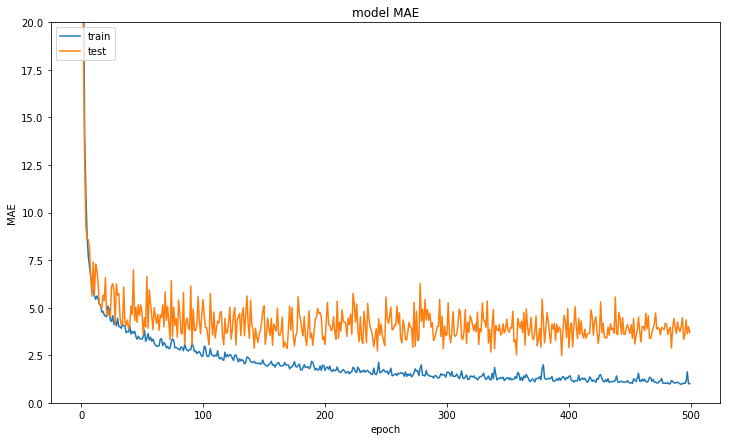

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7 #setting figure size


plt.plot(cnnhistory.history['mean_absolute_error'])
plt.plot(cnnhistory.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(ymax=20)
plt.ylim(ymin=0)
plt.show()

### Saving model

In [47]:
import os
model_name = 'guitar_dist_gain_regression_model_400ep_lr0.0001.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/stjepan/Downloads/saved_models/guitar_dist_gain_regression_model_400ep_lr0.0001.h5 


### Predctions

In [52]:
preds = model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)


preds=list(preds[:,0])
actual=list(y_test[:,0])

results = pd.DataFrame({'predicted' : preds, 'actual' : actual})    

results['diff'] = results['predicted'] - results['actual']
print(results['diff'].mean()) 
results.head(15)

209/209 [==============================] - 0s 1ms/step
-1.093804462959892


,predicted,actual,diff
0,41.198730,42,-0.801270
1,43.350414,44,-0.649586
2,27.503122,27,0.503122
3,45.036068,47,-1.963932
4,10.412045,8,2.412045
5,54.074150,57,-2.925850
6,54.554314,57,-2.445686
7,63.445229,66,-2.554771
8,5.702683,2,3.702683
9,68.952522,74,-5.047478


Baseline model predicts gain parameter value of guitar distorstion effect with average error of 1.5 (out of range 0-75)